### Installation
1. Run the first 2 cells
2. Restart runtime
3. Run the rest of the jupyter notebooks (do not run the first 2 cells again)

In [ ]:
!git clone -b main https://github.com/zcemycl/TF2DeepFloorplan.git
!pip install gdown
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
!unzip log.zip
!rm log.zip

Cloning into 'TF2DeepFloorplan'...
remote: Enumerating objects: 1051, done.
remote: Counting objects: 100% (479/479), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 1051 (delta 286), reused 363 (delta 235), pack-reused 572
Receiving objects: 100% (1051/1051), 8.14 MiB | 18.36 MiB/s, done.
Resolving deltas: 100% (587/587), done.
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
From (redirected): https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON&confirm=t&uuid=b875212c-51a9-47a6-a4d3-058b783ee886
To: /content/log.zip
100% 113M/113M [00:07<00:00, 14.4MB/s]
Archive:  log.zip
   creating: log/
   creating: log/store/
  inflating: log/store/checkpoint    
  inflating: log/store/events.out.tfevents.1604013900.yui-Inspiron-7590.21326.5.v2  
  inflating: log/store

In [ ]:
# gpu
# !cd TF2DeepFloorplan && pip install -e .[tfgpu]
# cpu
!cd TF2DeepFloorplan && pip install -e .[tfcpu]

Obtaining file:///content/TF2DeepFloorplan
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.6/225.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.4 MB/s eta 0:00:00
INFO: pip is looking at 

### Main Script

In [ ]:
import tensorflow as tf
import sys
# !pip install dfp
from dfp.net import *
from dfp.data import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from argparse import Namespace
import os
import gc
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
from dfp.utils.rgb_ind_convertor import *
from dfp.utils.util import *
from dfp.utils.legend import *
from dfp.utils.settings import *
from dfp.deploy import *
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False
[]


In [ ]:
img_path = './TF2DeepFloorplan/resources/30939153.jpg'
inp = mpimg.imread(img_path)
args = parse_args("--tomlfile ./TF2DeepFloorplan/docs/notebook.toml".split())
args = overwrite_args_with_toml(args)
args.image = img_path

In [ ]:
result = main(args)

58889256/58889256 [==============================] - 5s 0us/step


/content/TF2DeepFloorplan/src/dfp/utils/util.py:34: UserWarning: ignoring size because footprint is set
  ndimage.grey_erosion(output_array, size=(3, 3), footprint=el),


(600, 419, 3) (600, 419, 3)


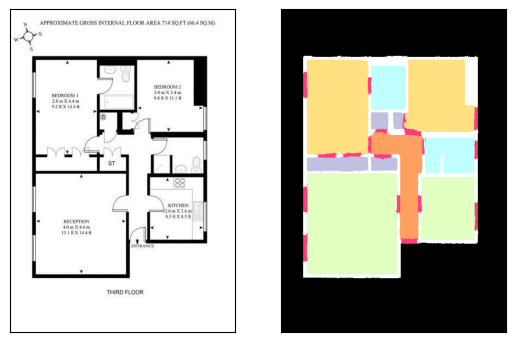

In [ ]:
plt.subplot(1,2,1)
plt.imshow(inp); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(result); plt.xticks([]); plt.yticks([]);

## Breakdown of postprocessing (step by step)

In [ ]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

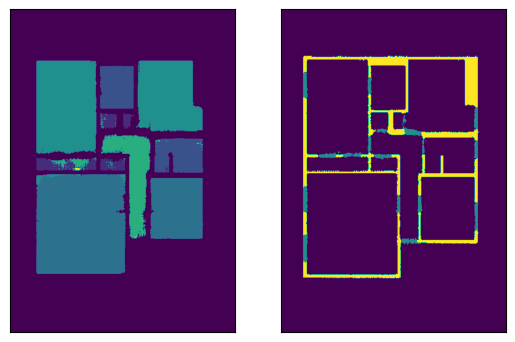

In [ ]:
logits_r = tf.image.resize(logits_r,shp[:2])
logits_cw = tf.image.resize(logits_cw,shp[:2])
r = convert_one_hot_to_image(logits_r)[0].numpy()
cw = convert_one_hot_to_image(logits_cw)[0].numpy()
plt.subplot(1,2,1)
plt.imshow(r.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw.squeeze()); plt.xticks([]); plt.yticks([]);

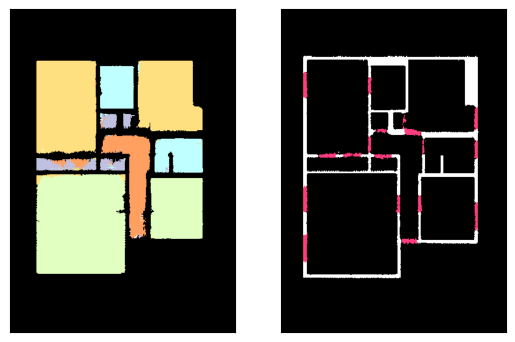

In [ ]:
r_color,cw_color = colorize(r.squeeze(),cw.squeeze())
plt.subplot(1,2,1)
plt.imshow(r_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

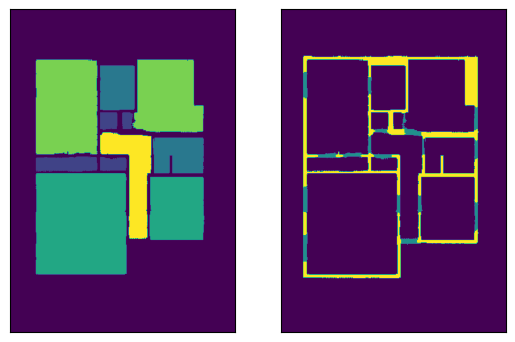

In [ ]:
newr,newcw = post_process(r,cw,shp)
plt.subplot(1,2,1)
plt.imshow(newr.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw.squeeze()); plt.xticks([]); plt.yticks([]);

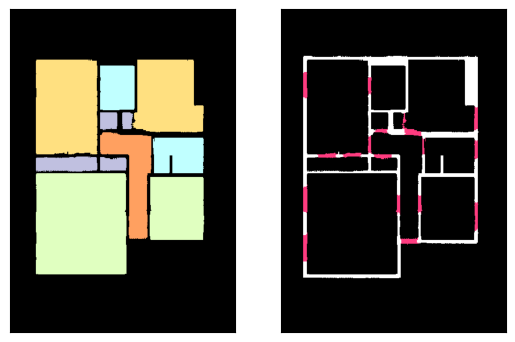

In [ ]:
newr_color,newcw_color = colorize(newr.squeeze(),newcw.squeeze())
plt.subplot(1,2,1)
plt.imshow(newr_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw_color); plt.xticks([]); plt.yticks([]);

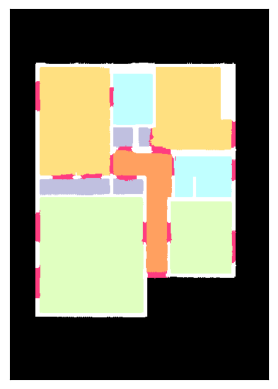

In [ ]:
plt.imshow(newr_color+newcw_color); plt.xticks([]); plt.yticks([]);

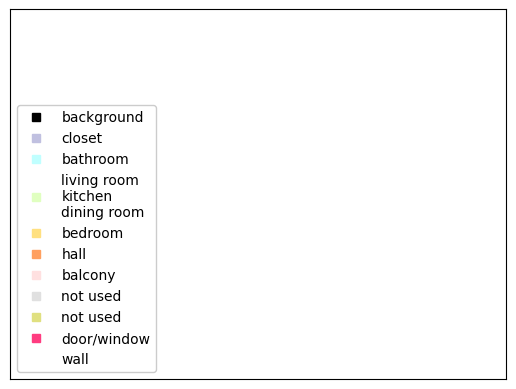

In [ ]:
over255 = lambda x: [p/255 for p in x]
colors2 = [over255(rgb) for rgb in list(floorplan_fuse_map.values())]
colors = ["background", "closet", "bathroom",
          "living room\nkitchen\ndining room",
          "bedroom","hall","balcony","not used","not used",
          "door/window","wall"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors2[i]) for i in range(len(colors))]
labels = colors
legend = plt.legend(handles, labels, loc=3,framealpha=1, frameon=True)

fig  = legend.figure
fig.canvas.draw()
plt.xticks([]); plt.yticks([]);
